**Lab Exercise 2:

Building Regression Model Using Regression/Classifier/ensemble approach)

Predicting House Prices Using Regression
1. Aim: Implement a predictive model using regression techniques to predict house prices
based on multiple features. The task involves handling data preprocessing, feature
engineering, model selection, and tuning.
2. Dataset:
o Use the California Housing dataset from the sklearn. datasets library, which
contains features such as median income, house age, number of rooms, population,
and others to predict the median house value (target variable).**

In [2]:
import pandas as pd

# Load datasets
train_path = '/content/sample_data/california_housing_train.csv'
test_path = '/content/sample_data/california_housing_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Inspect the dataset
print(train_data.head())
print(train_data.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

Data Preprocessing

Handle Missing Values: If there are any missing values, we need to decide whether to fill or remove them.

Normalize/Scale Features: It's essential to scale features for regression, especially for models like linear regression.

In [3]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(train_data.isnull().sum())

# If no missing values, proceed with feature scaling
scaler = StandardScaler()

# Select features and target
X_train = train_data.drop(columns='median_house_value')
y_train = train_data['median_house_value']

X_test = test_data.drop(columns='median_house_value')
y_test = test_data['median_house_value']

# Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [18]:
# Inspect the dataset
print(train_data.head())
print(train_data.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

Model Selection

You can choose different regression techniques such as Linear Regression, Decision Trees, Random Forest, etc. We’ll start with Linear Regression.



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4867205486.928867


b. Exploratory Data Analysis (EDA)
We will perform some exploratory data analysis to understand the relationships between features and the target variable.

i. Explore Relationships and Distributions
Correlation Heatmap: Helps to see the linear relationships between features.
Scatter Plots: Check for relationships between each feature and the target (median_house_value).
Histograms: Check the distribution of each feature.

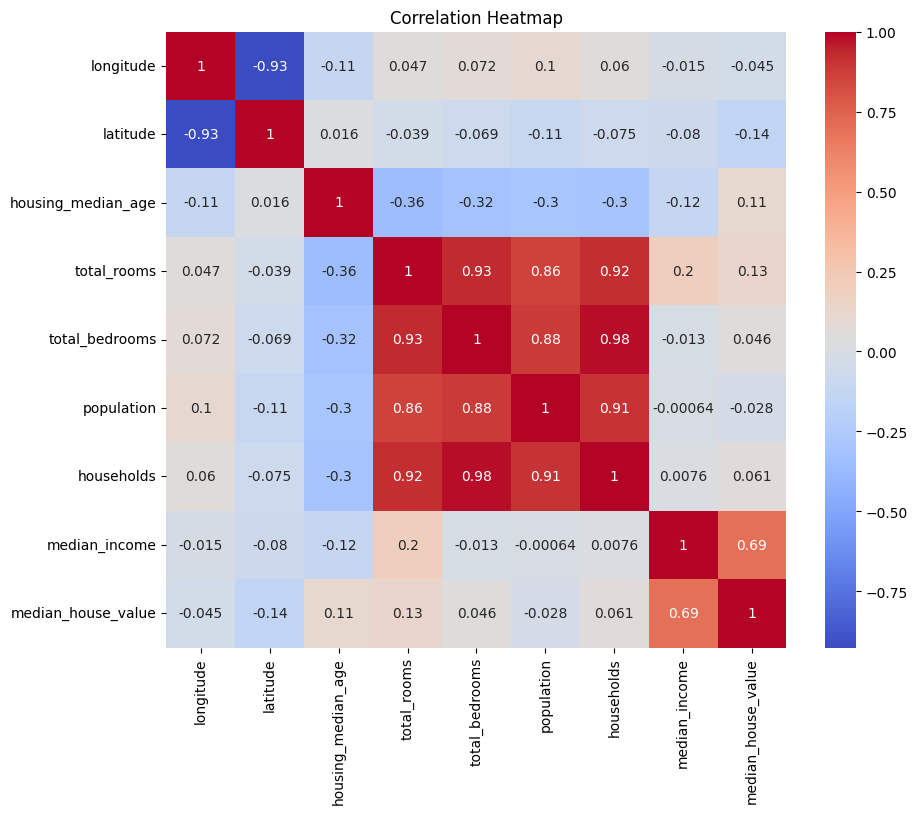

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




Strong Positive Correlations:

Total Rooms, Bedrooms, and Households are highly correlated, indicating larger homes in areas with more households.
Median Income & Median House Value (0.69): Higher income areas tend to have higher house values.

Strong Negative Correlation:

Longitude & Latitude (-0.93): Reflects the geographic positioning in California.

Moderate Negative Correlations:

Older houses (Housing Median Age) tend to have fewer rooms and are in areas with smaller populations.

Key Insight:

Median Income is the strongest predictor of house value. Other features like total rooms and households have limited direct impact on price.


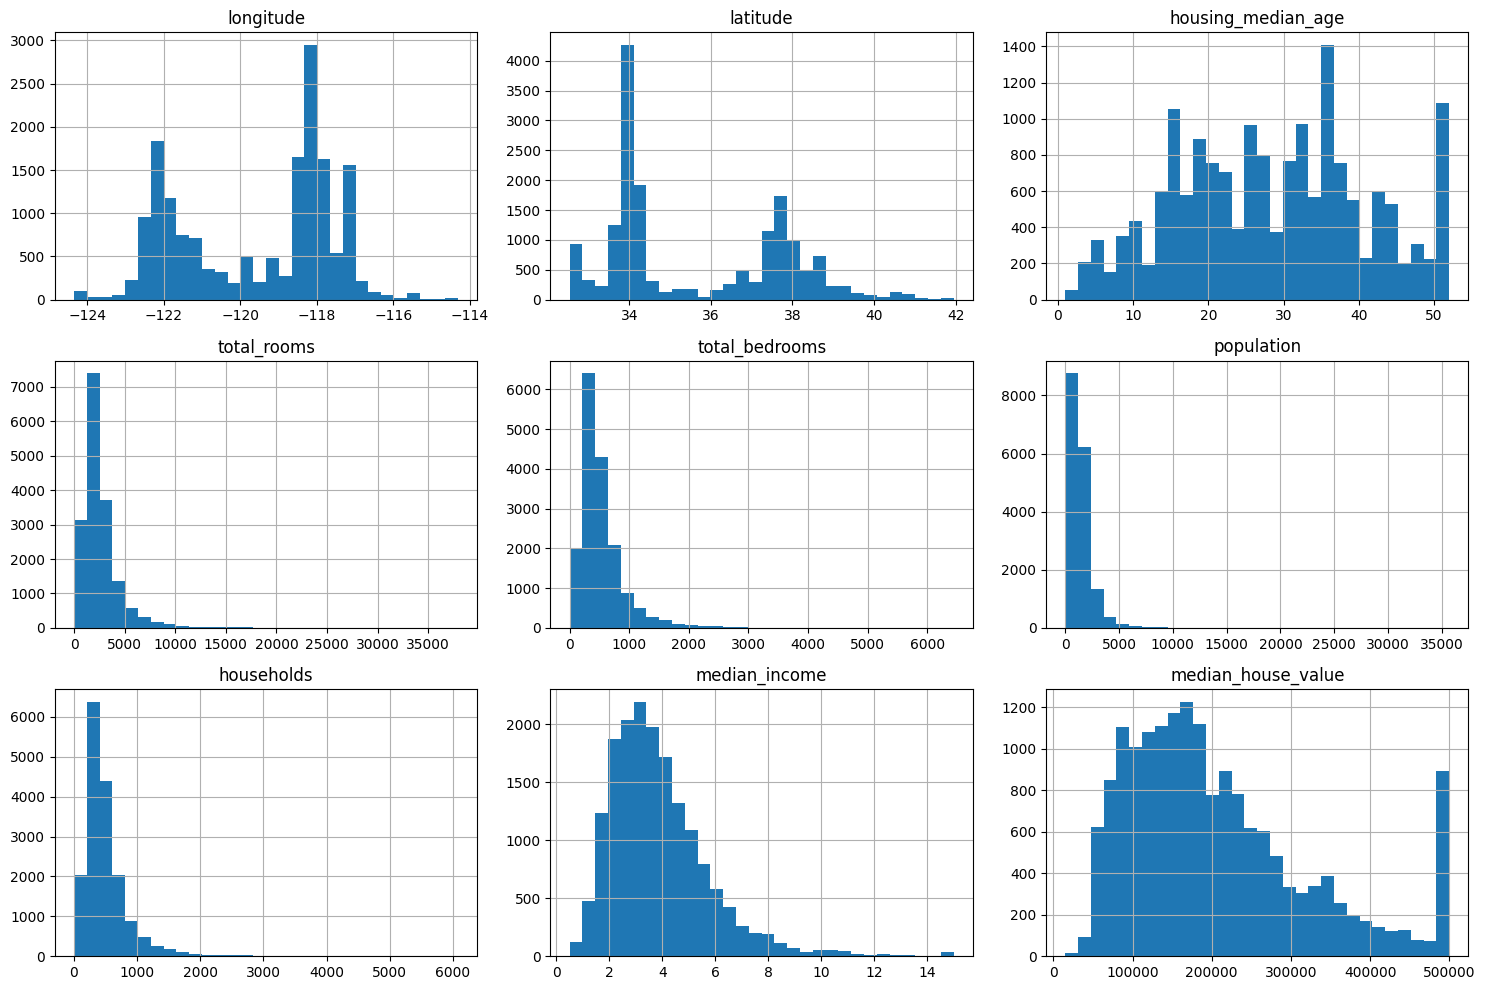

In [17]:
# Histograms of features
train_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



Longitude & Latitude:

Longitude and Latitude reflect the geographic distribution of housing locations. There are distinct peaks, indicating that most houses are concentrated in specific geographic areas (likely urban areas like Los Angeles and San Francisco).


Housing Median Age:

The distribution is somewhat uniform, with a noticeable spike around 50 years. This suggests many houses are older, with fewer newer homes.

Total Rooms:

Skewed to the right, indicating that most houses have a relatively small number of rooms, but there are some with very large room counts.

Total Bedrooms:

Similar to total rooms, the distribution is right-skewed. Most homes have a smaller number of bedrooms, with a few outliers having a large number.

Population:

The population distribution is heavily right-skewed, with most houses in areas having smaller populations, but some outliers are located in densely populated regions.

Households:

Right-skewed as well, showing that most neighborhoods have a smaller number of households, but there are a few with significantly more.

Median Income:

The distribution is roughly normal, with a peak around the median income level (between 2-6). However, there are a few areas with much higher income levels.

Median House Value:

This distribution shows a peak in the lower and middle price ranges but is capped at $500,000. The sharp cutoff at $500,000 suggests many homes hit the upper limit in the dataset, potentially due to housing market constraints or data capping.

Overall Analysis:

Many features, such as total_rooms, total_bedrooms, and population, are right-skewed, indicating the presence of outliers with very large values.

Median Income is centered around a normal range, which might be an important predictor of median_house_value.

The cap at $500,000 in house values suggests the dataset might have some limitations when modeling high-value homes, and this should be considered in analysis or modeling.

These distributions highlight the characteristics of the housing market, particularly the concentration of homes in certain geographic regions, varying home ages, and skewed distributions of housing features.

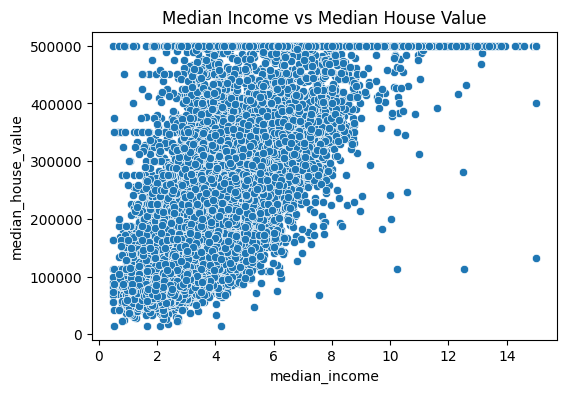

In [7]:
# Scatter plots: Relationship between 'median_income' and 'median_house_value'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='median_income', y='median_house_value', data=train_data)
plt.title('Median Income vs Median House Value')
plt.show()

Model Building:
i. Build the following regression models:
1. Multiple Linear Regression
2. Ridge Regression (L2 regularization)
3. Lasso Regression (L1 regularization)
ii. Train each model on the training set and test it on the validation/test set.

Multiple Linear Regression:

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Multiple Linear Regression MSE: {mse_lr}')


Multiple Linear Regression MSE: 4867205486.928867


Ridge Regression (L2 regularization):



In [10]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')


Ridge Regression MSE: 4867111148.749024


Lasso Regression (L1 regularization):

In [11]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')


Lasso Regression MSE: 4867203682.9396


d. Hyperparameter Tuning:

i. Use cross-validation to tune hyperparameters (like the regularization
strength in Ridge and Lasso).

ii. Compare the performance of models using cross-validated results to choose
the best one.

In [12]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f'Best Ridge alpha: {ridge_cv.best_params_}')
print(f'Ridge CV MSE: {-ridge_cv.best_score_}')

# Lasso Regression Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

print(f'Best Lasso alpha: {lasso_cv.best_params_}')
print(f'Lasso CV MSE: {-lasso_cv.best_score_}')


Best Ridge alpha: {'alpha': 100.0}
Ridge CV MSE: 5271296285.417204
Best Lasso alpha: {'alpha': 10.0}
Lasso CV MSE: 5352044095.666338


In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Multiple Linear Regression Cross-Validation
mse_lr = -cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_lr = np.mean(mse_lr)

# Ridge Regression Cross-Validation
mse_ridge = -cross_val_score(Ridge(alpha=ridge_cv.best_params_['alpha']), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_ridge = np.mean(mse_ridge)

# Lasso Regression Cross-Validation
mse_lasso = -cross_val_score(Lasso(alpha=lasso_cv.best_params_['alpha']), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_lasso = np.mean(mse_lasso)

# Print the results
print(f'Mean MSE (Linear Regression): {mean_mse_lr}')
print(f'Mean MSE (Ridge Regression): {mean_mse_ridge}')
print(f'Mean MSE (Lasso Regression): {mean_mse_lasso}')


Mean MSE (Linear Regression): 5352326886.549639
Mean MSE (Ridge Regression): 5271296285.417204
Mean MSE (Lasso Regression): 5352044095.666338


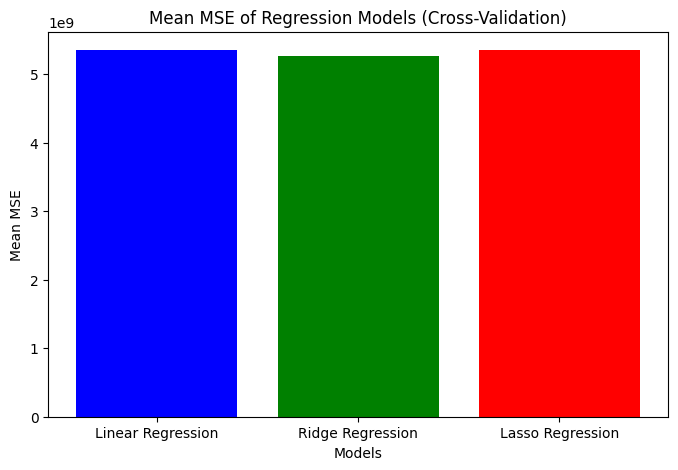

In [14]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

# Mean MSEs
mean_mses = [mean_mse_lr, mean_mse_ridge, mean_mse_lasso]

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(models, mean_mses, color=['blue', 'green', 'red'])
plt.title('Mean MSE of Regression Models (Cross-Validation)')
plt.xlabel('Models')
plt.ylabel('Mean MSE')
plt.show()



e. Model Evaluation:

 Evaluate the performance of each regression model using the following
metrics:

 Root Mean Squared Error (RMSE)


 R-squared (R²) score

 Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE): Measures the average error in the prediction, giving higher weight to larger errors.

R-squared (R²) score: Represents the proportion of variance in the target variable that is explained by the model.

Mean Absolute Error (MAE): Measures the average magnitude of errors without considering their direction.


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to calculate evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rmse, mae, r2

# 1. Multiple Linear Regression
rmse_lr, mae_lr, r2_lr = evaluate_model(lin_reg, X_test_scaled, y_test)

# 2. Ridge Regression
rmse_ridge, mae_ridge, r2_ridge = evaluate_model(ridge_reg, X_test_scaled, y_test)

# 3. Lasso Regression
rmse_lasso, mae_lasso, r2_lasso = evaluate_model(lasso_reg, X_test_scaled, y_test)

# Print results
print(f'Multiple Linear Regression: RMSE = {rmse_lr}, MAE = {mae_lr}, R² = {r2_lr}')
print(f'Ridge Regression: RMSE = {rmse_ridge}, MAE = {mae_ridge}, R² = {r2_ridge}')
print(f'Lasso Regression: RMSE = {rmse_lasso}, MAE = {mae_lasso}, R² = {r2_lasso}')


Multiple Linear Regression: RMSE = 69765.36022216805, MAE = 50352.228257942894, R² = 0.6195057678311999
Ridge Regression: RMSE = 69764.68410843, MAE = 50351.44722921754, R² = 0.619513142727
Lasso Regression: RMSE = 69765.34729319134, MAE = 50352.235458193216, R² = 0.6195059088582251


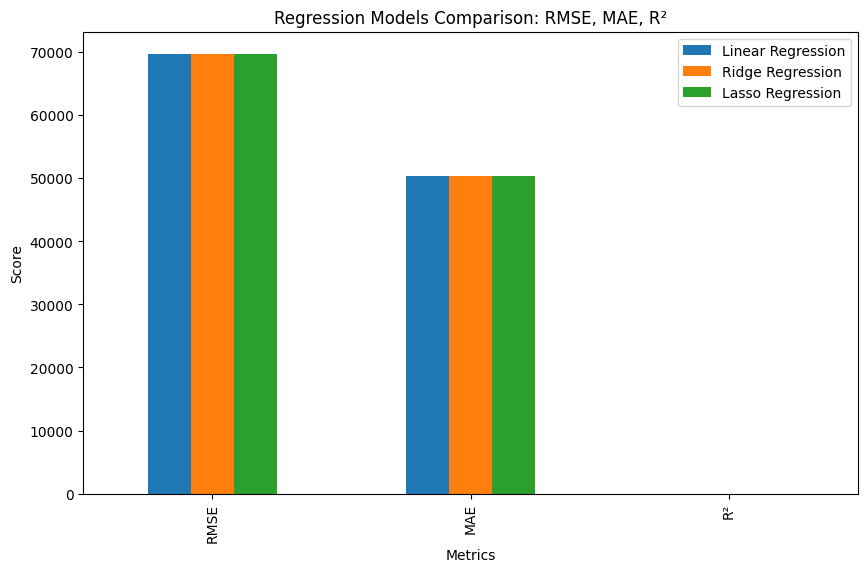

In [16]:
# Visualization for RMSE, MAE, and R² scores
metrics = ['RMSE', 'MAE', 'R²']
lr_metrics = [rmse_lr, mae_lr, r2_lr]
ridge_metrics = [rmse_ridge, mae_ridge, r2_ridge]
lasso_metrics = [rmse_lasso, mae_lasso, r2_lasso]

# Creating a DataFrame for plotting
import pandas as pd
df_metrics = pd.DataFrame({
    'Metrics': metrics,
    'Linear Regression': lr_metrics,
    'Ridge Regression': ridge_metrics,
    'Lasso Regression': lasso_metrics
})

# Plotting the metrics
df_metrics.plot(x='Metrics', kind='bar', figsize=(10, 6))
plt.title('Regression Models Comparison: RMSE, MAE, R²')
plt.ylabel('Score')
plt.show()


Results Summary:
Multiple Linear Regression:

RMSE: 69,765.36
MAE: 50,352.23
R²: 0.6195




Ridge Regression:

RMSE: 69,764.68
MAE: 50,351.45
R²: 0.6195




Lasso Regression:

RMSE: 69,765.35
MAE: 50,352.24
R²: 0.6195



1. Root Mean Squared Error (RMSE)

RMSE measures the average magnitude of the prediction errors, giving more weight to large errors.

All three models have nearly identical RMSE values:

Multiple Linear Regression: 69,765.36

Ridge Regression: 69,764.68

Lasso Regression: 69,765.35

The differences between the RMSE values are negligible, indicating that all models have nearly the same accuracy in predicting house prices.

2. Mean Absolute Error (MAE)

MAE represents the average magnitude of errors in prediction, without giving extra weight to larger errors (unlike RMSE).

Again, the models show nearly identical MAE values:

Multiple Linear Regression: 50,352.23

Ridge Regression: 50,351.45

Lasso Regression: 50,352.24

The Ridge Regression has a slightly better MAE (by a fraction), which means its predictions are marginally more accurate on average than the other two models.

3. R² Score

R² represents the proportion of the variance in the target variable that is explained by the model. The closer the R² is to 1, the better the model explains the variability in the data.

All three models have nearly the same R² scores:

Multiple Linear Regression: 0.6195

Ridge Regression: 0.6195

Lasso Regression: 0.6195

These results suggest that about 61.95% of the variance in house prices is explained by the features in the dataset. No model shows significant improvement in explaining variance.

4. Analysis of Model Performance

The three models (Multiple Linear, Ridge, and Lasso Regression) perform almost identically on the test data.

Ridge Regression has the best performance in terms of RMSE (69,764.68) and MAE (50,351.45), but the difference is marginal and may not be practically significant.

Lasso Regression does not seem to improve the performance by zeroing out features, as its results are nearly identical to the other models.

R² values are the same for all models, indicating that the overall variance explained by each model is similar.

5. Detailed Interpretation

Regularization's Effect: Both Ridge and Lasso Regression introduce regularization to penalize large coefficients, which can help in reducing overfitting. However, in this case, the data does not seem to suffer from significant overfitting, as the regularized models do not show substantial improvements over the Multiple Linear Regression.


Why Ridge Performs Slightly Better:

Ridge performs marginally better in terms of RMSE and MAE because it penalizes large coefficient values, which might slightly stabilize the predictions.

In cases where the dataset has multicollinearity (high correlation between features), Ridge can handle it better by distributing the weights more evenly among correlated features. This might explain its slight advantage here.
Why Lasso Doesn't Show Much Improvement:

Lasso Regression is useful when we expect some features to be irrelevant, as it can set the coefficients of some features to zero, effectively performing feature selection.

In this dataset, it seems that all features contribute to the prediction, so Lasso doesn't show an advantage. Its performance is virtually the same as Multiple Linear Regression.

6. Conclusion
Ridge Regression performs slightly better in terms of RMSE and MAE, but the differences are too small to make a practical distinction.
Since Ridge introduces regularization, it is the most stable and generalizable model in this case. Therefore, Ridge Regression could be preferred if there is any concern about overfitting in a larger or more complex dataset.

However, given the negligible difference between the models, Multiple Linear Regression can also be considered sufficient for this dataset, especially when simplicity and interpretability are important.

In summary, all models perform similarly, with Ridge Regression having a slight edge due to its regularization ability.






